<a href="https://colab.research.google.com/github/juniorskg/twicht-network-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
Twitch is an American video live-streaming service that focuses on video game live streaming. The datasets used for this analysis show   Twitch user to user networks of gamers who stream in Portuguese . Nodes are the users themselves and the links are  friendships between them and the weight is the some of the views of both user linked together.


Research question.
Which 5 twitch users will be more impactful for the promotion of a new games ?


import libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict

dataframe creation

In [ ]:
a= pd.read_csv("PTBR_edges.csv")
b=pd.read_csv("PTBR_target.csv")
#b["views"]=b["views"]/b["views"].sum()*1000
b=b[["new_id","views"]]
df=a.merge(b, left_on='from', right_on='new_id', how='left')
df=df.merge(b, left_on='to', right_on='new_id', how='left')

df.dropna()
df.head()

from    to  new_id_x  views_x  new_id_y  views_y
0     0    92         0      475        92    60988
1     0   428         0      475       428   552640
2     1   689         1      345       689  1796373
3     1  1147         1      345      1147  2076169
4     1  1666         1      345      1666  1671386

real network creation

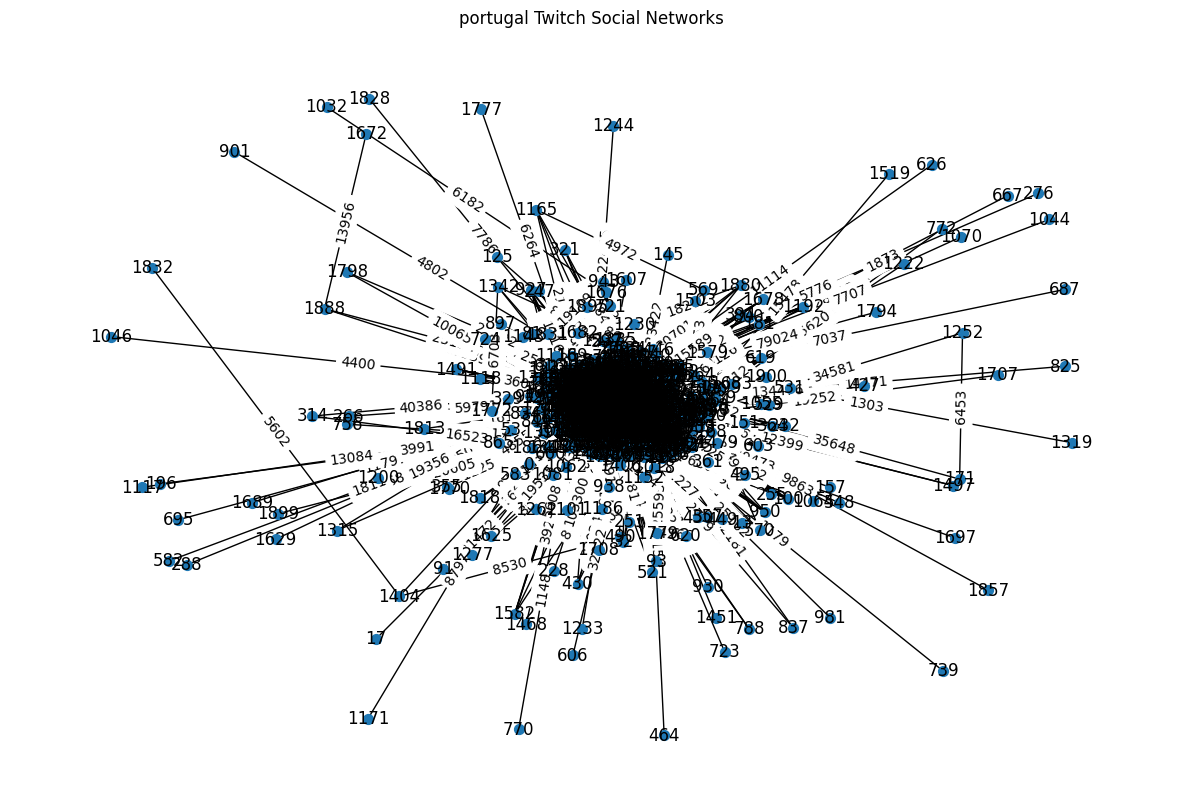

number of edge:31299
number of nodes:1912


In [ ]:

df["weight"]=df["views_x"]+df["views_y"]
G = nx.from_pandas_edgelist(df, 'from', 'to', edge_attr="weight")
plt.figure(figsize=(15, 10))
plt.title("portugal Twitch Social Networks")
pos = nx.spring_layout(G, k=5)
nx.draw(G,pos, with_labels=True,node_size=50)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"number of edge:{num_edges}")
print(f"number of nodes:{num_nodes}")


nodes degree and average degree

In [ ]:
#  the degrees of each nodes
degrees = dict(G.degree())

#  the average degree
average_degree = sum(degrees.values()) / len(G)
print(degrees)
print(len(G))
print(f"Average Degree: {average_degree}")

{0: 2, 92: 45, 428: 332, 1: 3, 689: 142, 1147: 216, 1666: 112, 2: 78, 179: 24, 587: 46, 474: 5, 287: 353, 126: 39, 590: 44, 289: 41, 530: 164, 291: 65, 848: 18, 267: 120, 1177: 92, 920: 30, 1785: 37, 923: 95, 417: 57, 1619: 31, 1040: 62, 656: 138, 1432: 9, 486: 43, 786: 41, 1138: 53, 1423: 83, 425: 49, 1365: 65, 19: 10, 1327: 11, 1025: 25, 132: 20, 866: 86, 1694: 44, 1443: 98, 608: 108, 249: 46, 609: 46, 1867: 120, 1345: 27, 99: 5, 1850: 83, 769: 120, 167: 54, 127: 767, 883: 41, 318: 135, 1384: 25, 1389: 51, 260: 112, 1455: 48, 78: 60, 1168: 30, 968: 18, 944: 38, 752: 35, 56: 29, 690: 17, 960: 47, 766: 16, 1093: 12, 1464: 21, 1720: 66, 36: 276, 1020: 38, 983: 11, 398: 58, 1193: 75, 207: 87, 1287: 196, 298: 44, 1158: 19, 1876: 21, 1241: 22, 1789: 17, 471: 320, 1782: 56, 1788: 9, 913: 72, 3: 57, 1422: 206, 894: 123, 1194: 78, 290: 590, 67: 454, 1245: 131, 851: 20, 1557: 186, 1142: 300, 422: 105, 1304: 83, 928: 182, 467: 582, 1502: 132, 1311: 292, 305: 279, 867: 19, 1758: 394, 1807: 101, 

Degree Distribution

Degree Distribution:
Degree 1: 112 nodes
Degree 2: 80 nodes
Degree 3: 62 nodes
Degree 4: 72 nodes
Degree 5: 63 nodes
Degree 6: 66 nodes
Degree 7: 57 nodes
Degree 8: 58 nodes
Degree 9: 51 nodes
Degree 10: 47 nodes
Degree 11: 60 nodes
Degree 12: 50 nodes
Degree 13: 44 nodes
Degree 14: 48 nodes
Degree 15: 38 nodes
Degree 16: 34 nodes
Degree 17: 33 nodes
Degree 18: 40 nodes
Degree 19: 42 nodes
Degree 20: 33 nodes
Degree 21: 31 nodes
Degree 22: 32 nodes
Degree 23: 28 nodes
Degree 24: 30 nodes
Degree 25: 22 nodes
Degree 26: 24 nodes
Degree 27: 19 nodes
Degree 28: 21 nodes
Degree 29: 23 nodes
Degree 30: 24 nodes
Degree 31: 19 nodes
Degree 32: 21 nodes
Degree 33: 12 nodes
Degree 34: 17 nodes
Degree 35: 12 nodes
Degree 36: 10 nodes
Degree 37: 14 nodes
Degree 38: 17 nodes
Degree 39: 15 nodes
Degree 40: 12 nodes
Degree 41: 20 nodes
Degree 42: 15 nodes
Degree 43: 11 nodes
Degree 44: 13 nodes
Degree 45: 12 nodes
Degree 46: 12 nodes
Degree 47: 8 nodes
Degree 48: 8 nodes
Degree 49: 8 nodes
Degree 50:

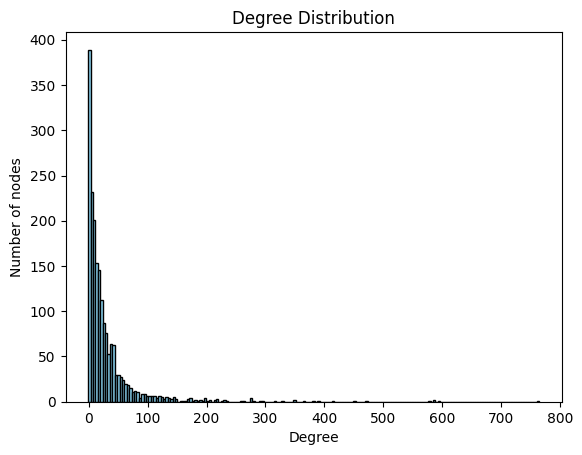

In [ ]:


degree_values = list(degrees.values())
#print(degree_values)
# degree distribution
degree_distribution = {degree: degree_values.count(degree) for degree in set(degree_values)}

# Print degree distribution
print("Degree Distribution:")
for degree, count in degree_distribution.items():
    print(f"Degree {degree}: {count} nodes")

# Visualize the degree distribution
plt.hist(degrees.values(), bins=len(degree_distribution),color='skyblue', edgecolor='black',align='left', rwidth=1)

plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution")
plt.show()




clustering

In [ ]:

# Calculate local clustering coefficients for all nodes
local_clustering_coefficients = nx.clustering(G)

# Calculate global clustering coefficient
global_clustering_coefficient = nx.average_clustering(G)

# Print results
print("Local Clustering Coefficients:")
for node, cc in local_clustering_coefficients.items():
    print(f"Node {node}: {cc}")

print(f"\nGlobal Clustering Coefficient: {global_clustering_coefficient}")

Local Clustering Coefficients:
Node 0: 0
Node 92: 0.1292929292929293
Node 428: 0.10999890801878208
Node 1: 0.3333333333333333
Node 689: 0.1967835381080811
Node 1147: 0.037252368647717485
Node 1666: 0.22023809523809523
Node 2: 0.1088911088911089
Node 179: 0.39492753623188404
Node 587: 0.2821256038647343
Node 474: 0
Node 287: 0.0890902652588205
Node 126: 0.3792172739541161
Node 590: 0.2758985200845666
Node 289: 0.4060975609756098
Node 530: 0.17439772557234776
Node 291: 0.26875
Node 848: 0.47058823529411764
Node 267: 0.18361344537815127
Node 1177: 0.24104156712852365
Node 920: 0.21839080459770116
Node 1785: 0.35735735735735735
Node 923: 0.23784994400895856
Node 417: 0.23308270676691728
Node 1619: 0.4129032258064516
Node 1040: 0.21417239555790588
Node 656: 0.11805775944144715
Node 1432: 0.4722222222222222
Node 486: 0.3654485049833887
Node 786: 0.21097560975609755
Node 1138: 0.3802612481857765
Node 1423: 0.18660005877167204
Node 425: 0.4192176870748299
Node 1365: 0.2639423076923077
Node 19:

Density

In [ ]:

graph_density = nx.density(G)


print(f"Graph Density: {graph_density}")

Graph Density: 0.017132150575067492


shortest path

Erdos-Reiny Graph

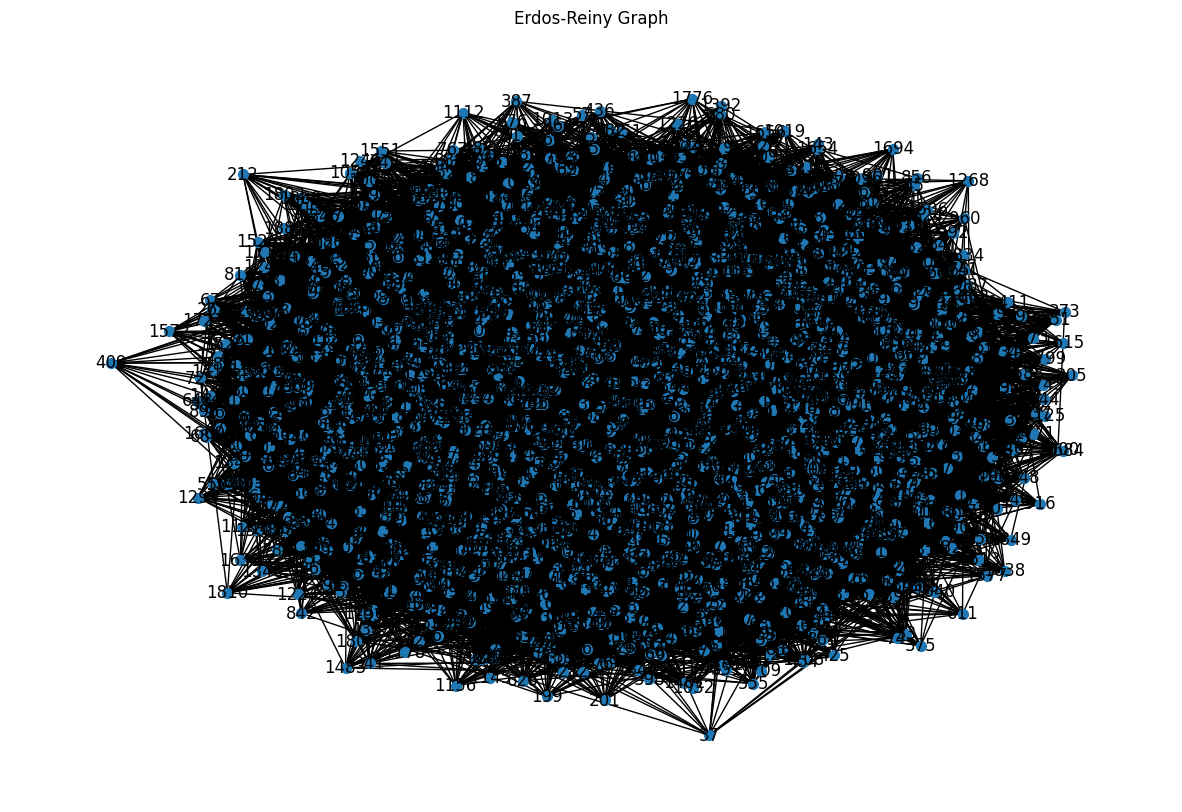

In [ ]:
erdos_renyi_graph = nx.erdos_renyi_graph (n=num_nodes, p=average_degree/num_nodes)



plt.figure(figsize=(15, 10))
plt. title("Erdos-Reiny Graph")
nx.draw(erdos_renyi_graph, with_labels=True,node_size=50)

plt.show()

# Watts-Strogatz Graph

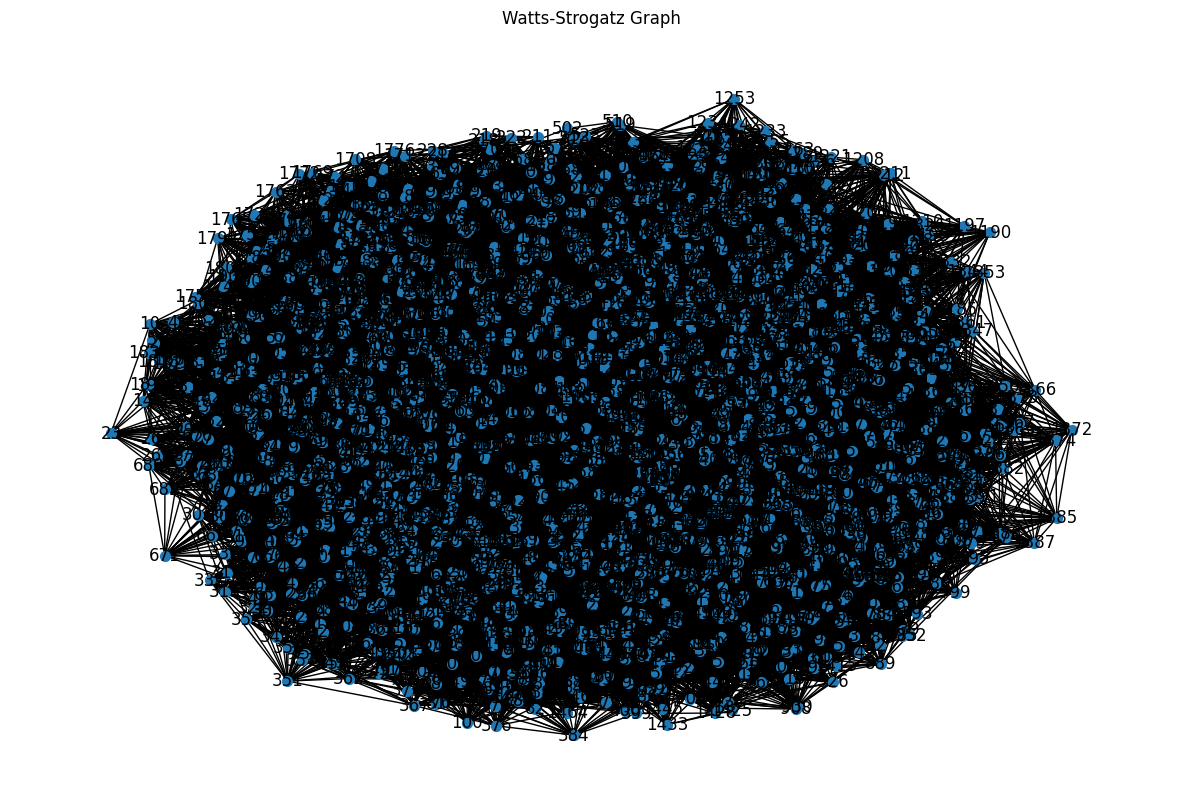

In [ ]:
watts_strogatz_graph = nx.watts_strogatz_graph(n=num_nodes, k=33, p=0.2)



plt.figure(figsize=(15, 10))
plt. title("Watts-Strogatz Graph")

nx. draw(watts_strogatz_graph, with_labels=True, node_size=50)

plt.show()

# Barabasi-Albert Graph

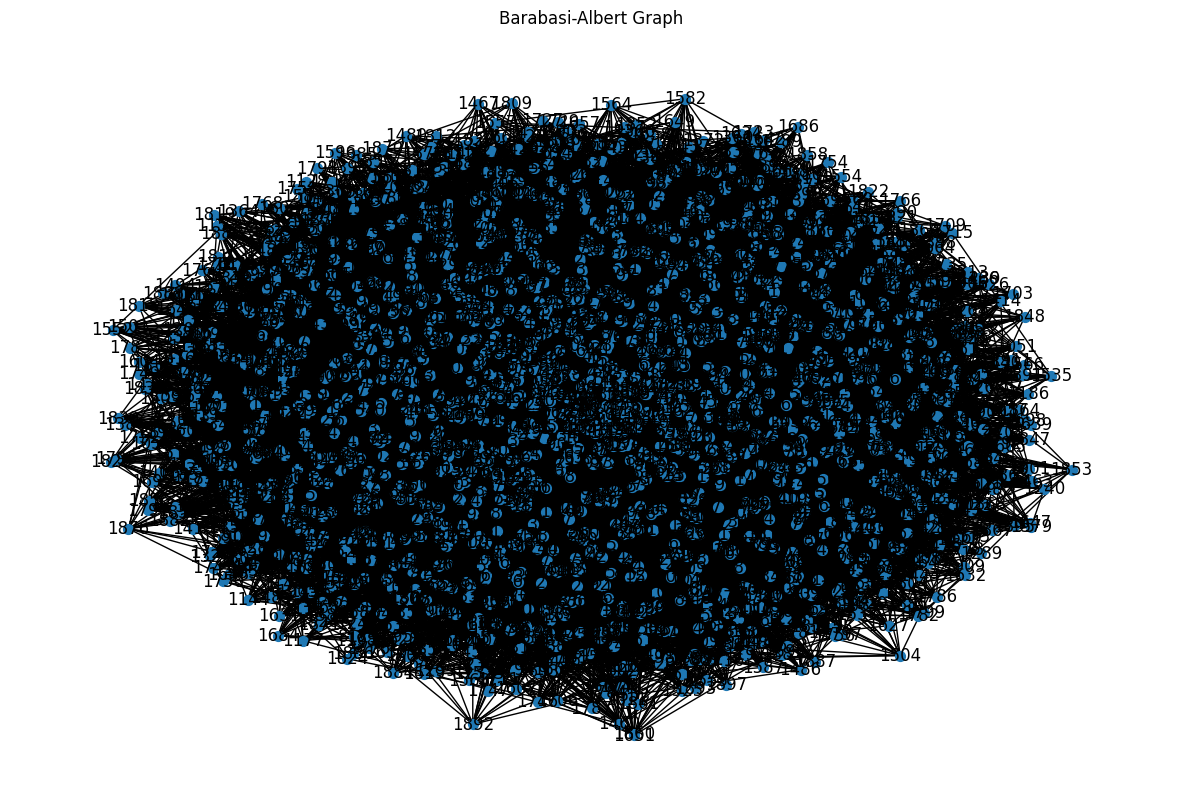

In [ ]:

barabasi_albert_graph = nx. barabasi_albert_graph (n=num_nodes, m= 17)
plt.figure(figsize=(15, 10))
plt. title("Barabasi-Albert Graph")
nx.draw(barabasi_albert_graph, with_labels=True,node_size=50)
plt.show()

function creation to calculate average degree, degree distribution, and clustering coefficient

In [ ]:
def calculate_and_plot(graph, title):
    # Calculate average degree
    avg_degree = np.mean(list(dict(graph.degree()).values()))
    print(f"{title} Average Degree: {avg_degree}")
    #calculate number of edges
    num_edges = graph.number_of_edges()
    print(f"{title} num_edges: {num_edges}")
    # Calculate degree distribution
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.hist(degree_sequence, bins=int(np.sqrt(len(degree_sequence))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("frequence")

    # Calculate clustering coefficient
    clustering_coefficient = nx.average_clustering(graph)
    print(f"{title}  Clustering Coefficient: {clustering_coefficient}")

    plt.subplot(122)
    nx.draw(graph, with_labels=True)
    plt.title(f"{title}  Graph Visualization")
    #cálculate clustering
    local_clustering_coefficients = nx.clustering(graph)
    plt.figure(figsize=(12, 4))
    plt.scatter(local_clustering_coefficients.keys(),local_clustering_coefficients.values())
    plt.title(f"{title} scatter plot of clustering_coefficients")
    plt.xlabel("node")
    plt.ylabel("clustering_coefficients")

    plt.tight_layout()
    plt.show()

portugal Twitch Social Networks Average Degree: 32.73953974895397
portugal Twitch Social Networks num_edges: 31299
portugal Twitch Social Networks  Clustering Coefficient: 0.3198952746693515


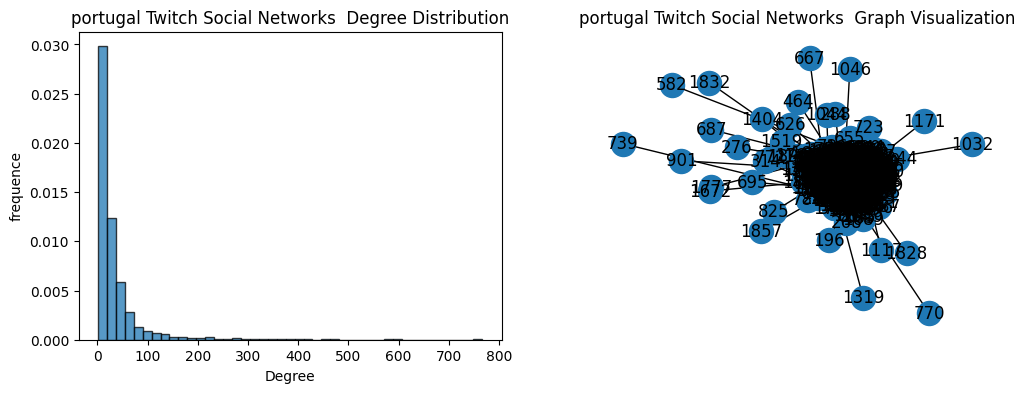

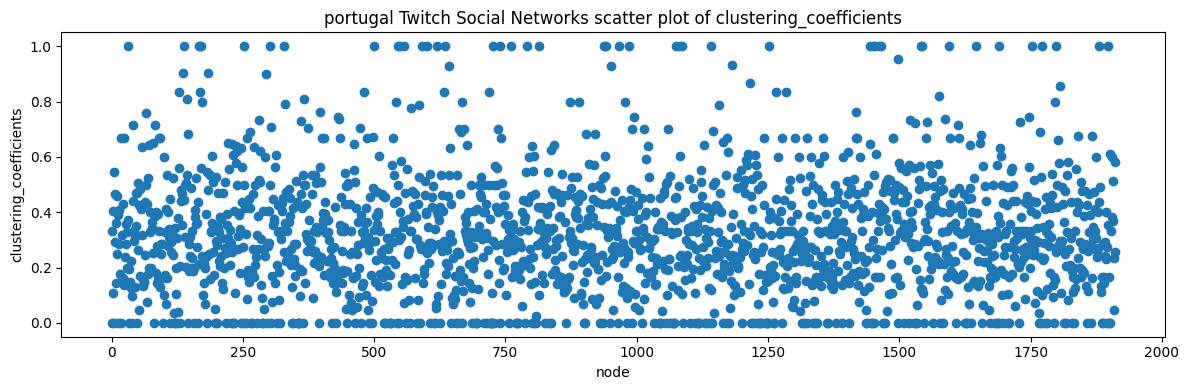

Erdos-Reiny Graph Average Degree: 32.65794979079498
Erdos-Reiny Graph num_edges: 31221
Erdos-Reiny Graph  Clustering Coefficient: 0.01676015423170738


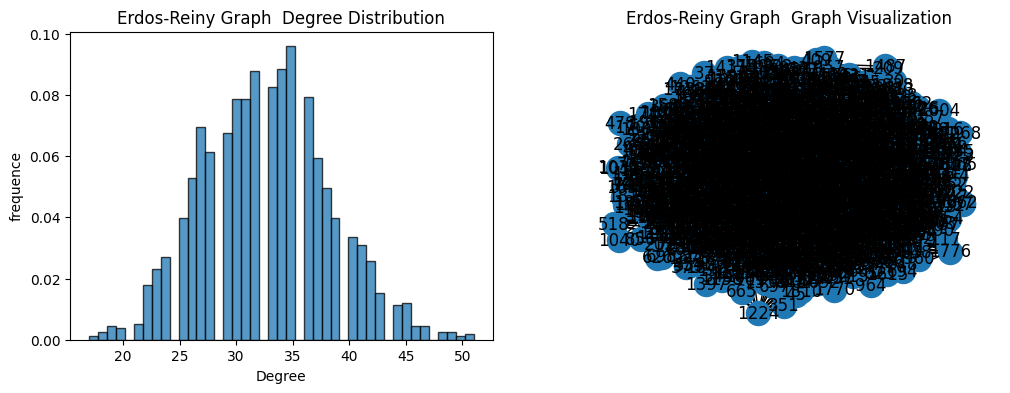

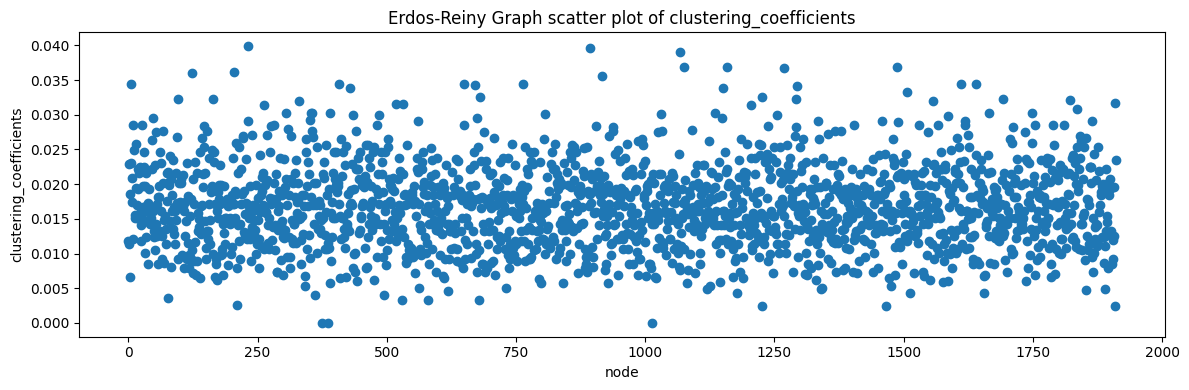

Watts-Strogatz Graph Average Degree: 32.0
Watts-Strogatz Graph num_edges: 30592
Watts-Strogatz Graph  Clustering Coefficient: 0.37232356173994763


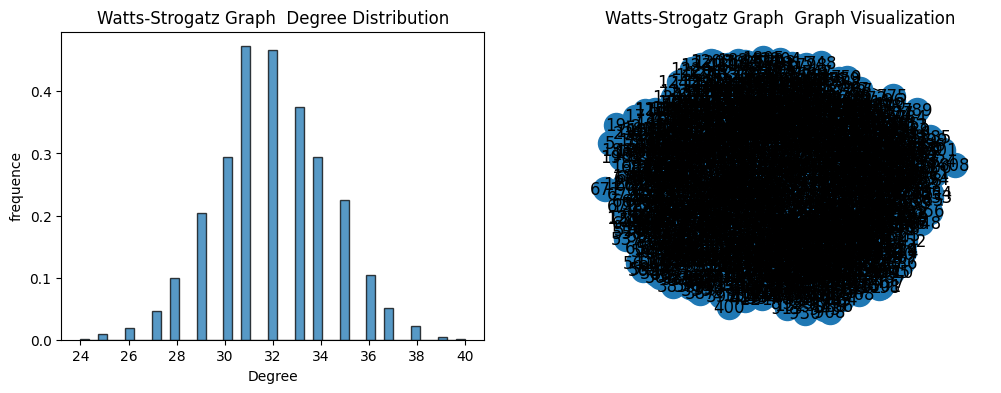

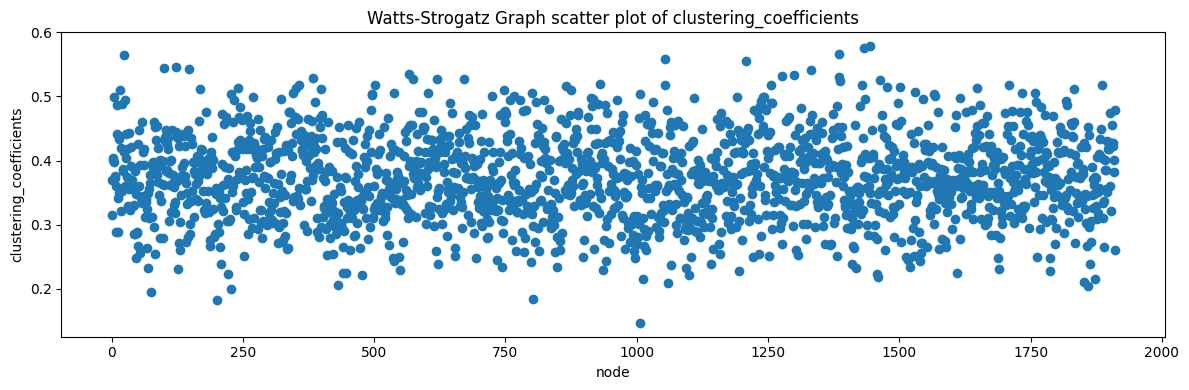

Barabasi-Albert Graph Average Degree: 33.69769874476987
Barabasi-Albert Graph num_edges: 32215
Barabasi-Albert Graph  Clustering Coefficient: 0.05507843162868719


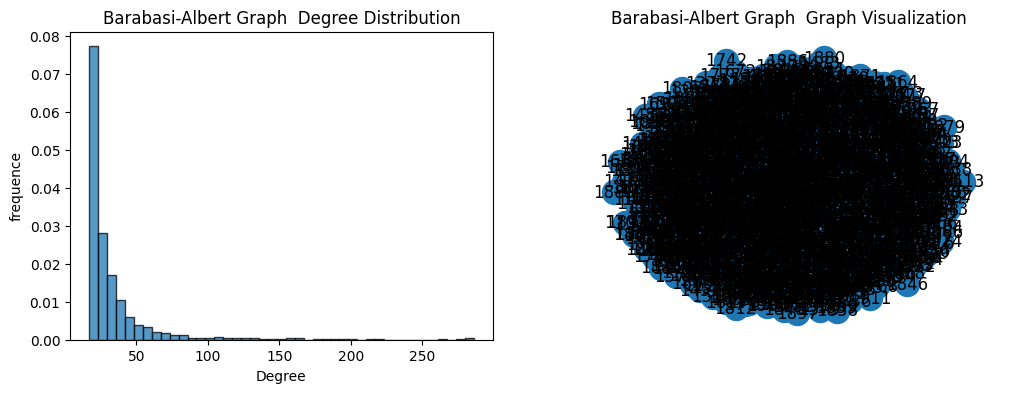

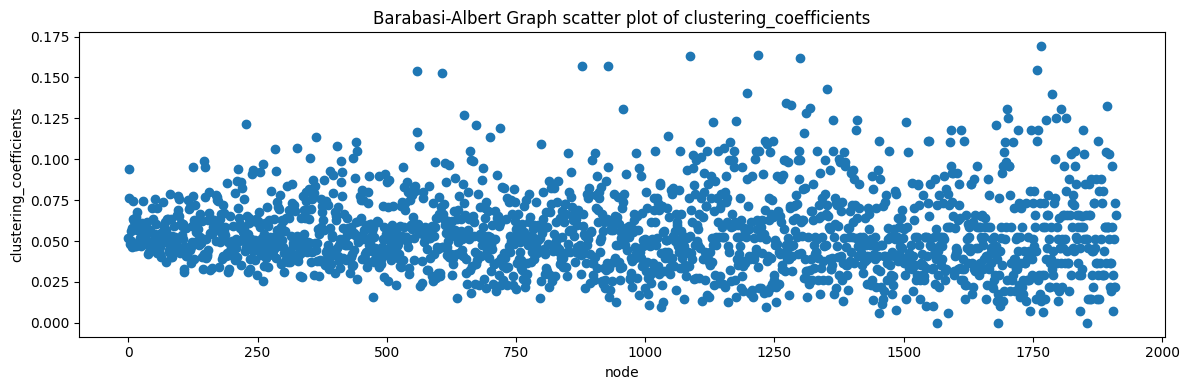

In [ ]:
# originalgraph
calculate_and_plot(G, "portugal Twitch Social Networks")
# Erdos-Reiny Graph
calculate_and_plot(erdos_renyi_graph, "Erdos-Reiny Graph")

# Watts-Strogatz Graph
calculate_and_plot(watts_strogatz_graph, "Watts-Strogatz Graph")

# Barabasi-Albert Graph
calculate_and_plot(barabasi_albert_graph, "Barabasi-Albert Graph")


In [ ]:
def analisys(graph, title):
    # degree centrality
    degree_centrality = nx.degree_centrality(graph)
    s_d=sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"degree centrality of {title} = {s_d[:5]}\n")
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.hist(degree_centrality.values(), bins=int(np.sqrt( len(degree_centrality))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  Degree centrality")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")

    #eigenvector centrality
    eigenvector_centrality = nx.eigenvector_centrality(graph,weight="weight")
    s_e=sorted(eigenvector_centrality .items(), key=lambda x: x[1], reverse=True)
    print(f"eigenvector centrality of {title} = {s_e[:5]}\n")

    plt.subplot(122)
    plt.hist(eigenvector_centrality .values(), bins=int(np.sqrt( len(eigenvector_centrality ))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  eigenvector centrality ")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")

    # pagerank
    pagerank = nx.pagerank(graph,weight="weight")
    s_p=sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
    print(f" pagerank of {title} = { s_p[:5]}\n")
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.hist(pagerank.values(), bins=int(np.sqrt( len(pagerank))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}   pagerank")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")



    #closeness_centrality
    closeness_centrality= nx.closeness_centrality(graph)
    s_c=sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f" closeness_centrality {title} = { s_c[:5]}\n")

    plt.subplot(122)
    plt.hist(closeness_centrality.values(), bins=int(np.sqrt( len(closeness_centrality))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}   closeness_centrality")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    # betweenness_centrality
    betweenness_centrality= nx.betweenness_centrality(graph,weight="weight")
    s_b=sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"betweenness centrality of {title} = {s_b[:5]}\n")
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.hist(betweenness_centrality.values(), bins=int(np.sqrt( len(betweenness_centrality))),edgecolor='black', density=True, alpha=0.75)
    plt.title(f"{title}  betweenness_centrality")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")


    plt.tight_layout()
    plt.show()

degree centrality of portugal Twitch Social Networks = [(127, 0.4013605442176871), (1476, 0.3129251700680272), (290, 0.3087388801674516), (1297, 0.30716902145473574), (467, 0.304552590266876)]

eigenvector centrality of portugal Twitch Social Networks = [(290, 0.6191524850705529), (1320, 0.17284612736192165), (127, 0.16689033964447328), (103, 0.15353011173759942), (1660, 0.15195247701020698)]

 pagerank of portugal Twitch Social Networks = [(290, 0.10674866060335149), (127, 0.048609544950128626), (1320, 0.027520816338327914), (1660, 0.02666298843329411), (103, 0.02282947660268765)]

 closeness_centrality portugal Twitch Social Networks = [(127, 0.6009433962264151), (1297, 0.5684116597263533), (467, 0.565050266114725), (290, 0.5595900439238654), (1476, 0.5594262295081968)]

betweenness centrality of portugal Twitch Social Networks = [(127, 0.4013605442176871), (1476, 0.3129251700680272), (290, 0.3087388801674516), (1297, 0.30716902145473574), (467, 0.304552590266876)]



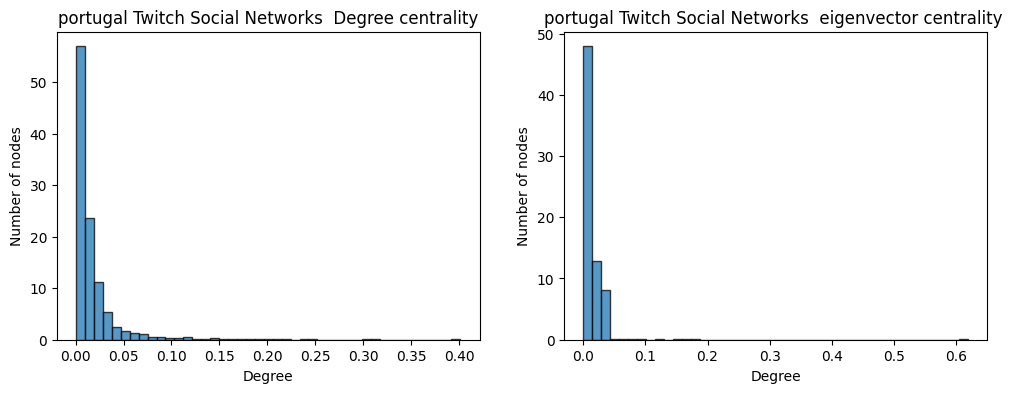

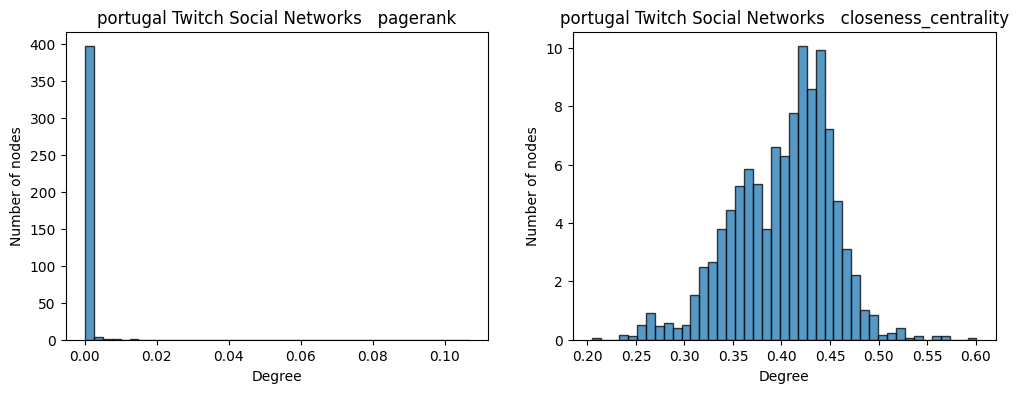

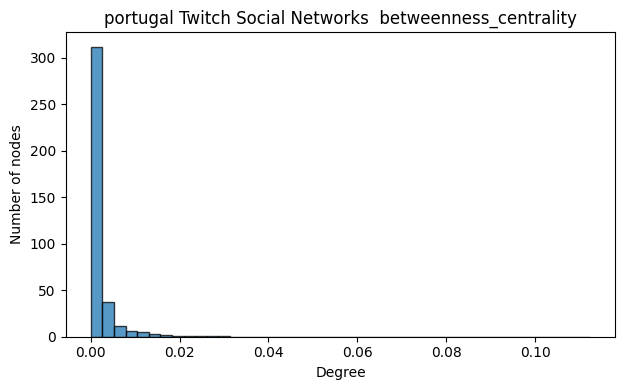

In [ ]:
# originalgraph
analisys(G, "portugal Twitch Social Networks")




Centrality measurement analysis
this is the ranking of the users with most connections in the networks: nodes with high connection have a high influence on the network
degree centrality of portugal Twitch Social Networks = [(127, 0.4013605442176871), (1476, 0.3129251700680272), (290, 0.3087388801674516), (1297, 0.30716902145473574), (467, 0.304552590266876)]

this ranking show the top 5 users that are linked to other the important users (highly central users): these node have the best collaborations in the network
eigenvector centrality of portugal Twitch Social Networks = [(290, 0.6191524850705529), (1320, 0.17284612736192165), (127, 0.16689033964447328), (103, 0.15353011173759942), (1660, 0.15195247701020698)]

this rank users by focusing on both the number of link point to the user and the importance of those link(users with high numbers and good quality connections)

 pagerank of portugal Twitch Social Networks = [(290, 0.10674866060335149), (127, 0.048609544950128626), (1320, 0.027520816338327914), (1660, 0.02666298843329411), (103, 0.02282947660268765)]

this is the ranking of user which are central in terms of information flow or accessibility.
 closeness_centrality portugal Twitch Social Networks = [(127, 0.6009433962264151), (1297, 0.5684116597263533), (467, 0.565050266114725), (290, 0.5595900439238654), (1476, 0.5594262295081968)]




degree centrality of Erdos-Reiny Graph = [(94, 0.026687598116169546), (640, 0.026687598116169546), (1549, 0.026687598116169546), (476, 0.026164311878597593), (639, 0.026164311878597593)]

eigenvector centrality of Erdos-Reiny Graph = [(640, 0.03658726772082056), (94, 0.03657445262499758), (1138, 0.03593191050681339), (476, 0.035862988162898964), (1549, 0.03475179763041155)]

 pagerank of Erdos-Reiny Graph = [(1549, 0.0007749640633717123), (640, 0.0007691847657453261), (94, 0.0007688661690567488), (639, 0.0007633436851754568), (476, 0.0007544329423876273)]

 closeness_centrality Erdos-Reiny Graph = [(94, 0.42363112391930835), (640, 0.4228811684000885), (1138, 0.4222271321254971), (476, 0.42027710578403343), (1234, 0.4189870642402982)]

betweenness centrality of Erdos-Reiny Graph = [(94, 0.026687598116169546), (640, 0.026687598116169546), (1549, 0.026687598116169546), (476, 0.026164311878597593), (639, 0.026164311878597593)]



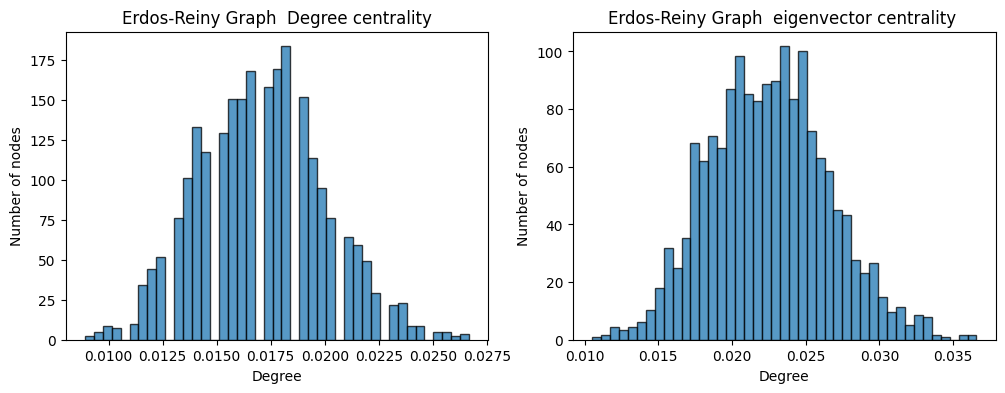

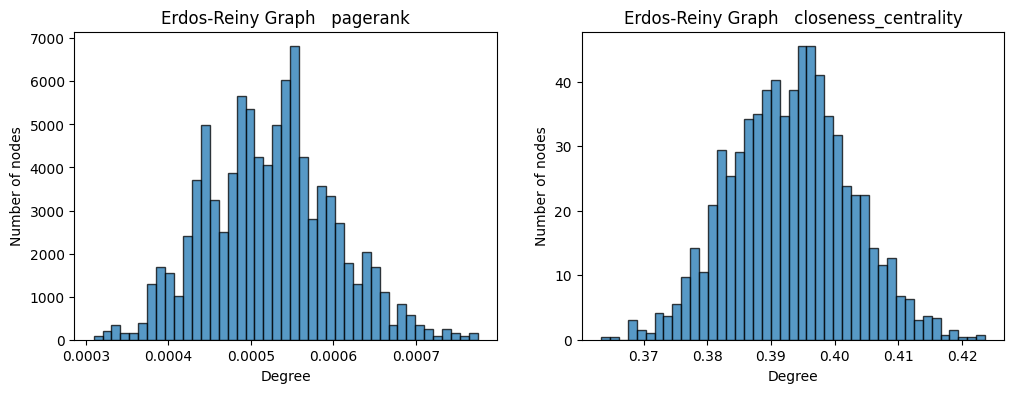

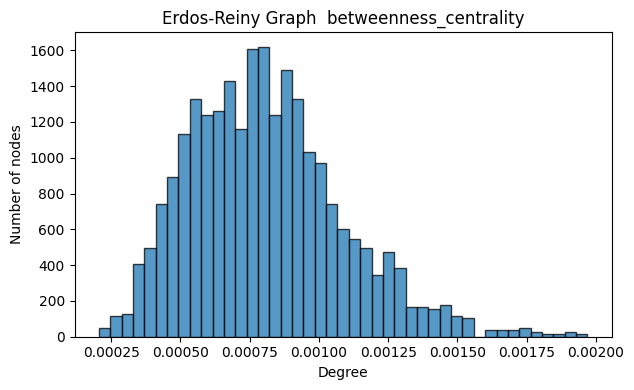

degree centrality of Watts-Strogatz Graph = [(440, 0.020931449502878077), (51, 0.020408163265306124), (1609, 0.020408163265306124), (1712, 0.020408163265306124), (278, 0.01988487702773417)]

eigenvector centrality of Watts-Strogatz Graph = [(1903, 0.02934834537668013), (1609, 0.029274063567187963), (1898, 0.029262668030237093), (1625, 0.0285623492604915), (1624, 0.02825815216363898)]

 pagerank of Watts-Strogatz Graph = [(440, 0.0006394860911238943), (1712, 0.0006207401675793448), (51, 0.0006195716993347268), (1609, 0.0006162592706545128), (278, 0.000610250858254107)]

 closeness_centrality Watts-Strogatz Graph = [(1007, 0.37849079025549615), (1609, 0.37551581843191195), (536, 0.375), (1528, 0.3737531781732838), (440, 0.3732421875)]

betweenness centrality of Watts-Strogatz Graph = [(440, 0.020931449502878077), (51, 0.020408163265306124), (1609, 0.020408163265306124), (1712, 0.020408163265306124), (278, 0.01988487702773417)]



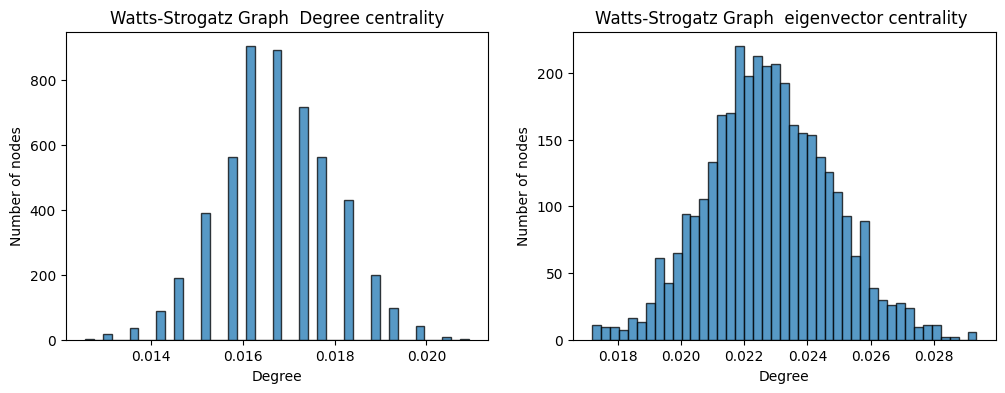

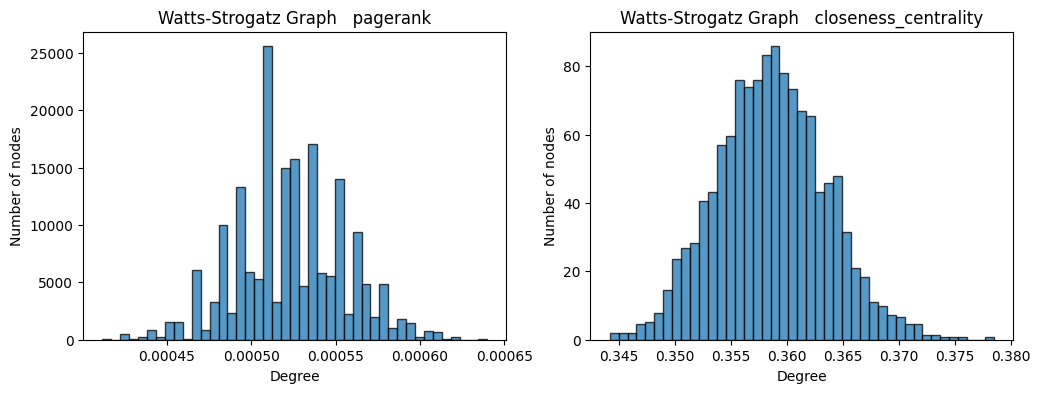

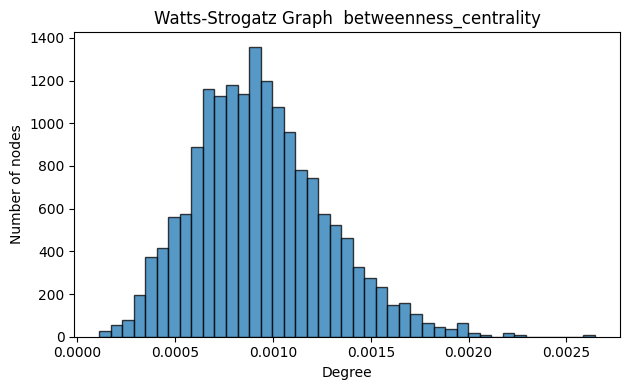

degree centrality of Barabasi-Albert Graph = [(21, 0.14965986394557823), (26, 0.14861329147043434), (25, 0.14704343275771847), (0, 0.14652014652014653), (19, 0.14495028780743066)]

eigenvector centrality of Barabasi-Albert Graph = [(0, 0.1455086653495098), (26, 0.1442906697189656), (21, 0.14241836316123735), (19, 0.13945329627796454), (22, 0.13725674047330108)]

 pagerank of Barabasi-Albert Graph = [(21, 0.0038649035040806113), (26, 0.0038116451868376033), (25, 0.0037970784714844064), (0, 0.003760927681817923), (19, 0.003730460493619017)]

 closeness_centrality Barabasi-Albert Graph = [(26, 0.5401356698699831), (21, 0.5396780570460322), (25, 0.5395256916996047), (0, 0.5392212189616253), (19, 0.538917089678511)]

betweenness centrality of Barabasi-Albert Graph = [(21, 0.14965986394557823), (26, 0.14861329147043434), (25, 0.14704343275771847), (0, 0.14652014652014653), (19, 0.14495028780743066)]



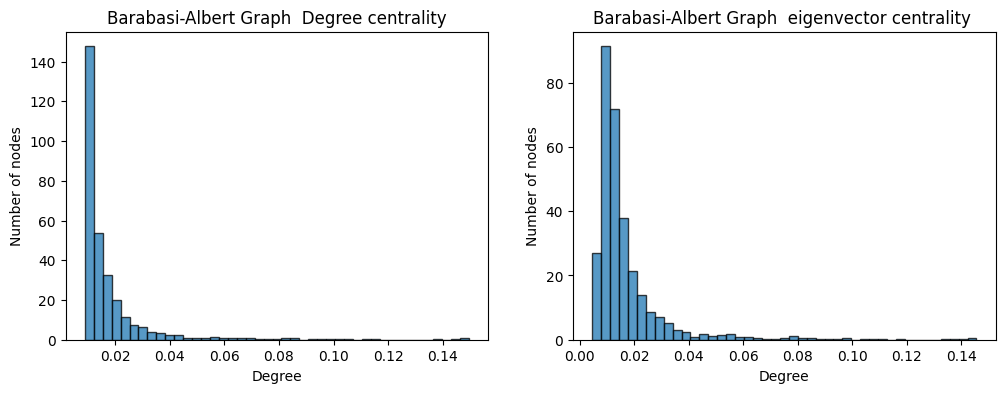

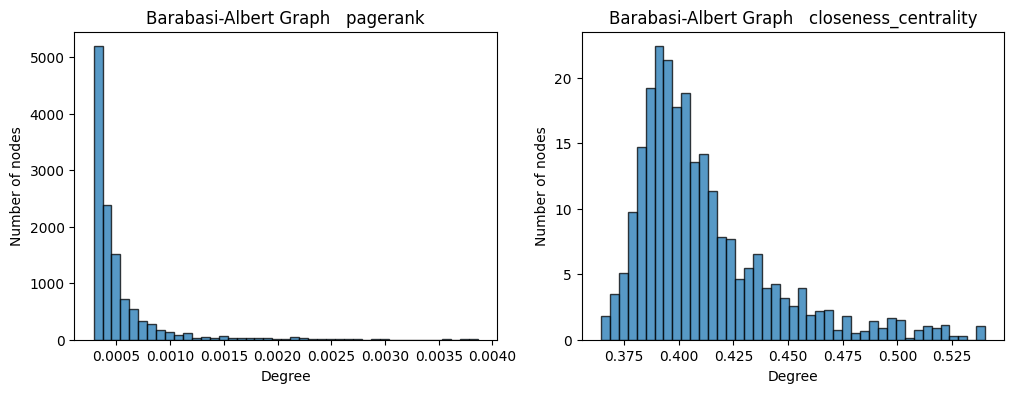

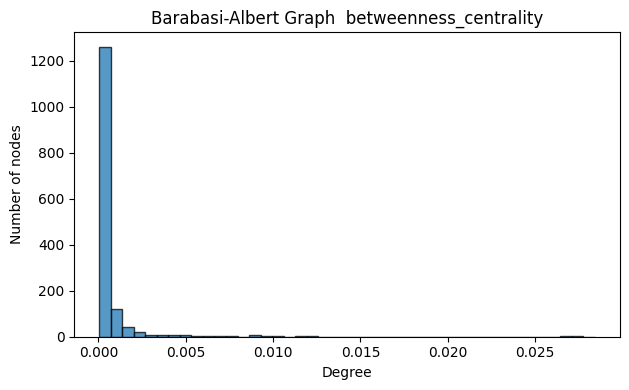

In [ ]:
# Erdos-Reiny Graph
analisys(erdos_renyi_graph, "Erdos-Reiny Graph")

# Watts-Strogatz Graph
analisys(watts_strogatz_graph, "Watts-Strogatz Graph")

# Barabasi-Albert Graph
analisys(barabasi_albert_graph, "Barabasi-Albert Graph")